## Example Notebook of the Social Thermodynamics Library

This notebook, goes through the main functionality of the Social Thermodynamics Library (STDL).
The library helps to analyse graphs that evolve over time by projecting onto the main layer and subsequently calculating the distances between entities the entities of that layer.

In [1]:
# install packages
#!conda install --yes --file requirements.txt

In [2]:
# import libraries
from STDL import STDC
import pandas as pd

In [3]:
# load example dataset Baboons’ interactions and preprocess
data = pd.read_csv('example_data/baboons_interactions.txt', sep="	", header=0)
data.columns = ["DateTime",	"Actor", "Recipient", "Behavior", "Category", "Duration", "Point"]
data = data.dropna()
data["DateTime"] = pd.to_datetime(data["DateTime"], dayfirst = True)
data = data.reset_index()
data = data.drop(columns=['index', 'Behavior', 'Category', 'Duration', 'Point'])

In [4]:
# initialize class where data is generated randomly
stdc = STDC(raw_data=data, field_names=['Actor', 'Recipient', 'DateTime'], timeframe='%Y-%m-%d')

In [5]:
# inspect randomly generated data
stdc.raw_data

,DateTime,Actor,Recipient
0,2019-06-13 09:50:00,ANGELE,FELIPE
1,2019-06-13 09:50:00,ANGELE,FELIPE
2,2019-06-13 09:51:00,FELIPE,ANGELE
3,2019-06-13 09:51:00,FELIPE,LIPS
4,2019-06-13 09:51:00,ANGELE,FELIPE
...,...,...,...
3191,2019-07-10 11:02:00,ARIELLE,LIPS
3192,2019-07-10 11:05:00,LIPS,NEKKE
3193,2019-07-10 11:05:00,LIPS,FELIPE
3194,2019-07-10 11:05:00,LIPS,NEKKE


In [6]:
# allocates timeframe bins based on user specified timeframe
stdc.calculate_timeframe()

,DateTime,Actor,Recipient,timeframe
0,2019-06-13 09:50:00,ANGELE,FELIPE,2019-06-13
1,2019-06-13 09:50:00,ANGELE,FELIPE,2019-06-13
2,2019-06-13 09:51:00,FELIPE,ANGELE,2019-06-13
3,2019-06-13 09:51:00,FELIPE,LIPS,2019-06-13
4,2019-06-13 09:51:00,ANGELE,FELIPE,2019-06-13
...,...,...,...,...
3190,2019-07-10 11:02:00,LIPS,ARIELLE,2019-07-10
3192,2019-07-10 11:05:00,LIPS,NEKKE,2019-07-10
3193,2019-07-10 11:05:00,LIPS,FELIPE,2019-07-10
3194,2019-07-10 11:05:00,LIPS,NEKKE,2019-07-10


In [7]:
# outputs a biadjacency matrix with unique entities of main layer and timeframe as multiindex
stdc.calculate_biadjacency_matrix()

Recipient            ANGELE  ARIELLE  ATMOSPHERE  BOBO  EWINE  EXTERNE  FANA  \
Actor    timeframe                                                             
ANGELE   2019-06-13     0.0      0.0         1.0   1.0    1.0      0.0   0.0   
         2019-06-14     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-17     0.0      2.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-18     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-06-19     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
...                     ...      ...         ...   ...    ...      ...   ...   
VIOLETTE 2019-07-04     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-05     1.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-08     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-09     0.0      0.0         0.0   0.0    0.0      0.0   0.0   
         2019-07-10     0.0      0.0         0.0   0.0    0.0      0.0   0.0   

Recipient            FELIPE  FEYA  HARLEM  ...  LOME  MAKO  MALI  MALI    \
Actor    timeframe                         ...                             
ANGELE   2019-06-13     8.0   0.0     0.0  ...   3.0   3.0   0.0     0.0   
         2019-06-14     8.0   0.0     0.0  ...   3.0   0.0   0.0     0.0   
         2019-06-17     0.0   2.0     0.0  ...   0.0   3.0   0.0     0.0   
         2019-06-18     2.0   0.0     0.0  ...   0.0   0.0   1.0     0.0   
         2019-06-19     5.0   1.0     0.0  ...   6.0   0.0   0.0     0.0   
...                     ...   ...     ...  ...   ...   ...   ...     ...   
VIOLETTE 2019-07-04     0.0   0.0     1.0  ...   0.0   0.0   0.0     0.0   
         2019-07-05     0.0   0.0     2.0  ...   0.0   0.0   0.0     0.0   
         2019-07-08     0.0   0.0     1.0  ...   0.0   1.0   0.0     0.0   
         2019-07-09     0.0   0.0     0.0  ...   0.0   0.0   2.0     0.0   
         2019-07-10     0.0   0.0     1.0  ...   0.0   0.0   0.0     0.0   

Recipient            MUSE  NEKKE  PETOULETTE  PIPO  SELF  VIOLETTE  
Actor    timeframe                                                  
ANGELE   2019-06-13   0.0    1.0         0.0   0.0   0.0       0.0  
         2019-06-14   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-06-17   0.0    0.0         4.0   0.0   0.0       0.0  
         2019-06-18   2.0    0.0         0.0   0.0   0.0       0.0  
         2019-06-19   0.0    0.0         0.0   0.0   0.0       1.0  
...                   ...    ...         ...   ...   ...       ...  
VIOLETTE 2019-07-04   0.0    0.0         1.0   0.0   0.0       0.0  
         2019-07-05   0.0    1.0         0.0   0.0   0.0       0.0  
         2019-07-08   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-07-09   0.0    0.0         0.0   0.0   0.0       0.0  
         2019-07-10   0.0    0.0         0.0   0.0   0.0       0.0  

[180 rows x 22 columns]

In [8]:
# project onto main layer and calculate positions
stdc.calculate_positions()

Actor                  ANGELE    FELIPE      FEYA      LIPS      LOME  \
Actor    timeframe                                                      
ANGELE   2019-06-13  0.000000  0.682449  0.695003  0.426712  0.734373   
FELIPE   2019-06-13  0.682449  0.000000  0.637857  0.319298  0.507982   
FEYA     2019-06-13  0.695003  0.637857  0.000000  0.797887  1.000000   
LIPS     2019-06-13  0.426712  0.319298  0.797887  0.000000  0.374764   
LOME     2019-06-13  0.734373  0.507982  1.000000  0.374764  0.000000   
...                       ...       ...       ...       ...       ...   
         2019-07-10  1.000000  1.000000  0.533592  0.838310  0.000000   
MUSE     2019-07-10  0.841886  1.000000  0.354990  0.403715  0.837302   
NEKKE    2019-07-10  1.000000  1.000000  0.729710  1.000000  0.045506   
PIPO     2019-07-10  1.000000  1.000000  1.000000  1.000000  1.000000   
VIOLETTE 2019-07-10  1.000000  1.000000  1.000000  1.000000  1.000000   

Actor                    MUSE     NEKKE      PIPO  VIOLETTE  
Actor    timeframe                                           
ANGELE   2019-06-13  0.726346  0.630241  0.593337  0.405245  
FELIPE   2019-06-13  0.384713  0.544700  0.939643  0.854608  
FEYA     2019-06-13  0.949093  0.760526  0.888889  0.923528  
LIPS     2019-06-13  0.379576  0.684185  0.757464  0.554868  
LOME     2019-06-13  0.478613  0.705928  0.883878  0.808190  
...                       ...       ...       ...       ...  
         2019-07-10  0.837302  0.045506  1.000000  1.000000  
MUSE     2019-07-10  0.000000  0.920000  1.000000  1.000000  
NEKKE    2019-07-10  0.920000  0.000000  1.000000  1.000000  
PIPO     2019-07-10  1.000000  1.000000  0.000000  1.000000  
VIOLETTE 2019-07-10  1.000000  1.000000  1.000000  0.000000  

[180 rows x 9 columns]

In [9]:
# initliaze STDC and specify dimensionality of positions
stdc_r = STDC(dimensions=2)

# calculate dimensionality reduced positions
stdc_r.calculate_reduced_positions()

,,0,1
id1,timeframe,,
L1_0,2020,0.030250,0.121259
L1_1,2020,-0.097292,-0.033981
L1_2,2020,0.002541,-0.125880
L1_0,2021,0.021461,0.109571
L1_1,2021,-0.088270,-0.021008
L1_2,2021,0.008685,-0.116671
L1_0,2022,0.127488,0.114250
L1_1,2022,-0.206061,-0.017876
L1_2,2022,0.105568,-0.105777


In [10]:
# calculate average reduced dimensionality positions between consecutive timeframes
stdc_r.calculate_aligned_reduced_positions()

0         1
id1  t1   t2                      
L1_0 2020 2021  0.025856  0.115415
     2021 2022  0.074475  0.111910
     2022 2023  0.119028  0.108479
     2023 2024  0.115135  0.098445
L1_1 2020 2021 -0.092781 -0.027495
     2021 2022 -0.147166 -0.019442
     2022 2023 -0.212873  0.014020
     2023 2024 -0.212269  0.030458
L1_2 2020 2021  0.005613 -0.121275
     2021 2022  0.057126 -0.111224
     2022 2023  0.131018 -0.099685
     2023 2024  0.144949 -0.090847

In [11]:
# calculate graph based on similarities
stdc.calculate_graphs()

{'2019-06-13': <Graph object, undirected, with 9 vertices and 35 edges, 1 internal edge property, at 0x1b4b64050>,
 '2019-06-14': <Graph object, undirected, with 9 vertices and 25 edges, 1 internal edge property, at 0x1b49a2210>,
 '2019-06-17': <Graph object, undirected, with 9 vertices and 16 edges, 1 internal edge property, at 0x1b49a2490>,
 '2019-06-18': <Graph object, undirected, with 9 vertices and 22 edges, 1 internal edge property, at 0x1b4b3c640>,
 '2019-06-19': <Graph object, undirected, with 9 vertices and 26 edges, 1 internal edge property, at 0x1b4b3cc30>,
 '2019-06-20': <Graph object, undirected, with 9 vertices and 20 edges, 1 internal edge property, at 0x198099370>,
 '2019-06-21': <Graph object, undirected, with 9 vertices and 23 edges, 1 internal edge property, at 0x1b4b12250>,
 '2019-06-24': <Graph object, undirected, with 9 vertices and 23 edges, 1 internal edge property, at 0x1b4b12360>,
 '2019-06-25': <Graph object, undirected, with 9 vertices and 26 edges, 1 intern

In [12]:
# calculate communities of graphs
stdc.calculate_communities()

{'2019-06-13': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b4b64050, at 0x1b4c10a60>,
 '2019-06-14': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b49a2210, at 0x1b4c10bb0>,
 '2019-06-17': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b49a2490, at 0x1b4c10c20>,
 '2019-06-18': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b4b3c640, at 0x1b4c10c90>,
 '2019-06-19': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b4b3cc30, at 0x1b4c10d00>,
 '2019-06-20': <VertexPropertyMap object with value type 'int32_t', for Graph 0x198099370, at 0x1b4c10d70>,
 '2019-06-21': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b4b12250, at 0x1b4c10ad0>,
 '2019-06-24': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b4b12360, at 0x1b4c10de0>,
 '2019-06-25': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1b49b7650, at 0x1b4c10e50>,
 '2019-06-26': <VertexProper

In [13]:
# calculate modularities of communities
stdc.calculate_modularities()

,timeframe,modularity
0,2019-06-13,0.093288
1,2019-06-14,0.146451
2,2019-06-17,0.256814
3,2019-06-18,0.240228
4,2019-06-19,0.114858
5,2019-06-20,0.076981
6,2019-06-21,0.071951
7,2019-06-24,0.133841
8,2019-06-25,0.123625
9,2019-06-26,0.309519


In [14]:
# calculate average between modularities of consecutive timeframes
stdc.calculate_aligned_modularities()

,t1,t2,modularity
0,2019-06-13,2019-06-14,0.119869
1,2019-06-14,2019-06-17,0.201632
2,2019-06-17,2019-06-18,0.248521
3,2019-06-18,2019-06-19,0.177543
4,2019-06-19,2019-06-20,0.095919
5,2019-06-20,2019-06-21,0.074466
6,2019-06-21,2019-06-24,0.102896
7,2019-06-24,2019-06-25,0.128733
8,2019-06-25,2019-06-26,0.216572
9,2019-06-26,2019-06-27,0.284523


In [15]:
# calculated the difference in reduced positions between consecutive timeframes
stdc.calculate_velocities()

Actor                             ANGELE    FELIPE      FEYA      LIPS  \
Actor    t1         t2                                                   
ANGELE   2019-06-13 2019-06-14  0.000000  0.237544  0.246873  0.035008   
         2019-06-14 2019-06-17  0.000000 -0.030089 -0.397718  0.169006   
         2019-06-17 2019-06-18  0.000000  0.050228  0.077878  0.369274   
         2019-06-18 2019-06-19  0.000000 -0.258976  0.282352 -0.451421   
         2019-06-19 2019-06-20  0.000000  0.192856 -0.340823  0.419247   
...                                  ...       ...       ...       ...   
VIOLETTE 2019-07-03 2019-07-04 -0.220193 -0.160128  0.175412 -0.230940   
         2019-07-04 2019-07-05  0.153966 -0.215111 -0.123091  0.230940   
         2019-07-05 2019-07-08  0.066227  0.375239  0.123091 -0.404145   
         2019-07-08 2019-07-09 -0.080845 -0.458831  0.000000  0.404145   
         2019-07-09 2019-07-10  0.080845  0.458831  0.000000  0.000000   

Actor                               LOME      MUSE     NEKKE      PIPO  \
Actor    t1         t2                                                   
ANGELE   2019-06-13 2019-06-14 -0.067736  0.083822  0.369759  0.406663   
         2019-06-14 2019-06-17  0.333363  0.189832 -0.217597  0.000000   
         2019-06-17 2019-06-18 -0.106000  0.000000 -0.175240  0.000000   
         2019-06-18 2019-06-19 -0.336793  0.000000  0.306450  0.000000   
         2019-06-19 2019-06-20  0.039881 -0.267261 -0.026162  0.000000   
...                                  ...       ...       ...       ...   
VIOLETTE 2019-07-03 2019-07-04 -0.135665  0.000000  0.000000 -0.577350   
         2019-07-04 2019-07-05 -0.359769 -0.157135  0.000000  0.577350   
         2019-07-05 2019-07-08  0.005536  0.107808  0.000000 -0.251976   
         2019-07-08 2019-07-09 -0.510102  0.049326 -0.301893  0.251976   
         2019-07-09 2019-07-10  1.000000  0.000000  0.301893  0.000000   

Actor                           VIOLETTE  
Actor    t1         t2                    
ANGELE   2019-06-13 2019-06-14  0.594755  
         2019-06-14 2019-06-17 -0.142134  
         2019-06-17 2019-06-18  0.142134  
         2019-06-18 2019-06-19 -0.102643  
         2019-06-19 2019-06-20  0.102643  
...                                  ...  
VIOLETTE 2019-07-03 2019-07-04  0.000000  
         2019-07-04 2019-07-05  0.000000  
         2019-07-05 2019-07-08  0.000000  
         2019-07-08 2019-07-09  0.000000  
         2019-07-09 2019-07-10  0.000000  

[171 rows x 9 columns]

### Statistics

In [16]:
# calculate_basic_ts_stats() outputs two statistics dataframes
ps, vs = stdc.calculate_basic_ts_stats()

display(ps)
display(vs)

Actor                    ANGELE                    FELIPE                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.649672  0.073021     9  0.640386  0.093675     9   
2019-06-14 2019-06-17  0.750303  0.096691     9  0.752511  0.093407     9   
2019-06-17 2019-06-18  0.764910  0.102342     9  0.742327  0.088213     9   
2019-06-18 2019-06-19  0.753646  0.091500     9  0.678968  0.082087     9   
2019-06-19 2019-06-20  0.729166  0.090966     9  0.617385  0.085163     9   
2019-06-20 2019-06-21  0.665789  0.090263     9  0.609579  0.117936     9   
2019-06-21 2019-06-24  0.624570  0.082224     9  0.660226  0.089127     9   
2019-06-24 2019-06-25  0.692731  0.083498     9  0.713245  0.089699     9   
2019-06-25 2019-06-26  0.741032  0.093389     9  0.801488  0.100570     9   
2019-06-26 2019-06-27  0.819453  0.105297     9  0.768828  0.093251     9   
2019-06-27 2019-06-28  0.825588  0.102263     9  0.685360  0.077548     9   
2019-06-28 2019-07-01  0.782422  0.110793     9  0.765294  0.099923     9   
2019-07-01 2019-07-02  0.726955  0.112435     9  0.746176  0.109468     9   
2019-07-02 2019-07-03  0.737590  0.088374     9  0.629535  0.089127     9   
2019-07-03 2019-07-04  0.759104  0.084035     9  0.657386  0.106485     9   
2019-07-04 2019-07-05  0.708337  0.091381     9  0.717789  0.090140     9   
2019-07-05 2019-07-08  0.767343  0.105428     9  0.706862  0.085487     9   
2019-07-08 2019-07-09  0.762426  0.103348     9  0.692712  0.082795     9   
2019-07-09 2019-07-10  0.737923  0.106963     9  0.758156  0.098587     9   

Actor                      FEYA                      LIPS  ...  MUSE  \
                           mean       var count      mean  ... count   
t1         t2                                              ...         
2019-06-13 2019-06-14  0.768515  0.087780     9  0.558902  ...     9   
2019-06-14 2019-06-17  0.759909  0.094475     9  0.702338  ...     9   
2019-06-17 2019-06-18  0.738189  0.098583     9  0.753277  ...     9   
2019-06-18 2019-06-19  0.732239  0.084512     9  0.686226  ...     9   
2019-06-19 2019-06-20  0.755550  0.086948     9  0.638083  ...     9   
2019-06-20 2019-06-21  0.749428  0.097860     9  0.607853  ...     9   
2019-06-21 2019-06-24  0.679852  0.098350     9  0.635303  ...     9   
2019-06-24 2019-06-25  0.684569  0.091631     9  0.699854  ...     9   
2019-06-25 2019-06-26  0.756174  0.089154     9  0.740394  ...     9   
2019-06-26 2019-06-27  0.797381  0.127218     9  0.783717  ...     9   
2019-06-27 2019-06-28  0.782441  0.152158     9  0.724678  ...     9   
2019-06-28 2019-07-01  0.752104  0.095004     9  0.699934  ...     9   
2019-07-01 2019-07-02  0.741802  0.089665     9  0.708667  ...     9   
2019-07-02 2019-07-03  0.701840  0.092966     9  0.632789  ...     9   
2019-07-03 2019-07-04  0.648836  0.093160     9  0.570797  ...     9   
2019-07-04 2019-07-05  0.649940  0.092040     9  0.638118  ...     9   
2019-07-05 2019-07-08  0.689609  0.093567     9  0.717941  ...     9   
2019-07-08 2019-07-09  0.784914  0.102389     9  0.706770  ...     9   
2019-07-09 2019-07-10  0.758112  0.098470     9  0.693775  ...     9   

Actor                     NEKKE                      PIPO                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.681206  0.081580     9  0.750674  0.099501     9   
2019-06-14 2019-06-17  0.722642  0.088582     9  0.860587  0.105921     9   
2019-06-17 2019-06-18  0.695914  0.084981     9  0.882598  0.109774     9   
2019-06-18 2019-06-19  0.776842  0.093886     9  0.862312  0.108119     9   
2019-06-19 2019-06-20  0.756135  0.096027     9  0.868603  0.109743     9   
2019-06-20 2019-06-21  0.657953  0.094769     9  0.888889  0.111111     9   
2019-06-21 2019-06-24  0.68

Actor                    ANGELE                    FELIPE                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.211854  0.047763     9  0.198272  0.058559     9   
2019-06-14 2019-06-17 -0.010593  0.050169     9  0.025977  0.097704     9   
2019-06-17 2019-06-18  0.039808  0.024105     9 -0.046344  0.046380     9   
2019-06-18 2019-06-19 -0.062337  0.066684     9 -0.080373  0.026743     9   
2019-06-19 2019-06-20  0.013376  0.051469     9 -0.042794  0.087626     9   
2019-06-20 2019-06-21 -0.140129  0.035301     9  0.027182  0.038315     9   
2019-06-21 2019-06-24  0.057691  0.054944     9  0.074112  0.064442     9   
2019-06-24 2019-06-25  0.078631  0.059926     9  0.031925  0.062536     9   
2019-06-25 2019-06-26  0.017971  0.071558     9  0.144561  0.056101     9   
2019-06-26 2019-06-27  0.138872  0.046180     9 -0.209882  0.063931     9   
2019-06-27 2019-06-28 -0.126601  0.027907     9  0.042946  0.161467     9   
2019-06-28 2019-07-01  0.040269  0.025236     9  0.116923  0.072083     9   
2019-07-01 2019-07-02 -0.151203  0.030423     9 -0.155160  0.053846     9   
2019-07-02 2019-07-03  0.172472  0.091409     9 -0.078122  0.271257     9   
2019-07-03 2019-07-04 -0.129443  0.051296     9  0.133825  0.100320     9   
2019-07-04 2019-07-05  0.027909  0.079395     9 -0.013019  0.034801     9   
2019-07-05 2019-07-08  0.090102  0.117732     9 -0.008835  0.089799     9   
2019-07-08 2019-07-09 -0.099935  0.058337     9 -0.019466  0.079419     9   
2019-07-09 2019-07-10  0.050928  0.028672     9  0.150354  0.057924     9   

Actor                      FEYA                      LIPS  ...  MUSE  \
                           mean       var count      mean  ... count   
t1         t2                                              ...         
2019-06-13 2019-06-14  0.058635  0.033495     9  0.163414  ...     9   
2019-06-14 2019-06-17 -0.075848  0.059146     9  0.123457  ...     9   
2019-06-17 2019-06-18  0.032409  0.057486     9 -0.021579  ...     9   
2019-06-18 2019-06-19 -0.044309  0.052157     9 -0.112524  ...     9   
2019-06-19 2019-06-20  0.090931  0.042865     9  0.016239  ...     9   
2019-06-20 2019-06-21 -0.103175  0.030142     9 -0.076698  ...     9   
2019-06-21 2019-06-24 -0.035978  0.034357     9  0.131597  ...     9   
2019-06-24 2019-06-25  0.045410  0.060019     9 -0.002494  ...     9   
2019-06-25 2019-06-26  0.097800  0.089383     9  0.083574  ...     9   
2019-06-26 2019-06-27 -0.015385  0.017941     9  0.003072  ...     9   
2019-06-27 2019-06-28 -0.014495  0.002667     9 -0.121151  ...     9   
2019-06-28 2019-07-01 -0.046179  0.145976     9  0.071664  ...     9   
2019-07-01 2019-07-02  0.025577  0.035665     9 -0.054198  ...     9   
2019-07-02 2019-07-03 -0.105501  0.076605     9 -0.097559  ...     9   
2019-07-03 2019-07-04 -0.000507  0.092877     9 -0.026424  ...     9   
2019-07-04 2019-07-05  0.002715  0.047959     9  0.161065  ...     9   
2019-07-05 2019-07-08  0.076623  0.083397     9 -0.001418  ...     9   
2019-07-08 2019-07-09  0.113988  0.066172     9 -0.020923  ...     9   
2019-07-09 2019-07-10 -0.167591  0.091198     9 -0.005067  ...     9   

Actor                     NEKKE                      PIPO                  \
                           mean       var count      mean       var count   
t1         t2                                                               
2019-06-13 2019-06-14  0.198833  0.021976     9  0.163224  0.033842     9   
2019-06-14 2019-06-17 -0.115962  0.064532     9  0.056603  0.007540     9   
2019-06-17 2019-06-18  0.062506  0.070134     9 -0.012582  0.000944     9   
2019-06-18 2019-06-19  0.099351  0.016821     9 -0.027990  0.016908     9   
2019-06-19 2019-06-20 -0.140764  0.076930     9  0.040572  0.014815     9   
2019-06-20 2019-06-21 -0.055599  0.092570     9  0.000000  0.000000     9   
2019-06-21 2019-06-24  0.11

In [17]:
# calculates thermodynamic statistics
stdc.calculate_thermodyn_ts_stats()

,,Vol,Temp,V_CoM,Mod,CNT
t1,t2,,,,,
2019-06-13,2019-06-14,0.000015,0.393283,0.490118,0.119869,9.0
2019-06-14,2019-06-17,0.000024,0.635383,0.239282,0.201632,9.0
2019-06-17,2019-06-18,0.000028,0.502332,0.110709,0.248521,9.0
2019-06-18,2019-06-19,0.000021,0.346017,0.241192,0.177543,9.0
2019-06-19,2019-06-20,0.000022,0.586979,0.276591,0.095919,9.0
2019-06-20,2019-06-21,0.000034,0.413486,0.219953,0.074466,9.0
2019-06-21,2019-06-24,0.000019,0.545131,0.260449,0.102896,9.0
2019-06-24,2019-06-25,0.000021,0.403945,0.185727,0.128733,9.0
2019-06-25,2019-06-26,0.000025,0.548355,0.330288,0.216572,9.0


### Visualisations

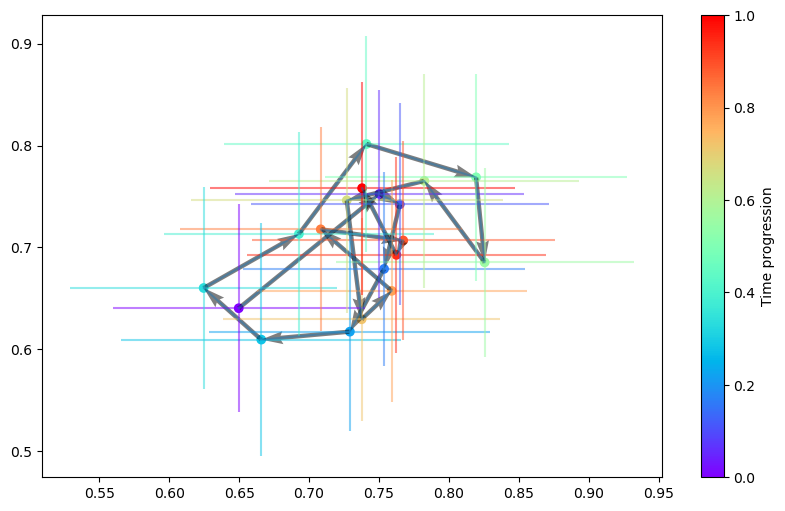

In [18]:
# outputs the trajectory of mean reduced positions along with error
stdc.plot_center_of_mass_trajectory()

In [19]:
# pass labels to track specific Baboons
labels = {
    'ANGELE': 'A',
    'FELIPE': 'F',
    'PIPO': 'P'
}

In [20]:
# evolution of reduced positions over all timeframes
stdc.plot_reduced_positions_animation(labels=labels)